In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\smrut\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("restaurants.csv")

In [3]:
data.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[float, int]))

In [5]:
numerical_features = data.select_dtypes(include=[float, int]).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features])

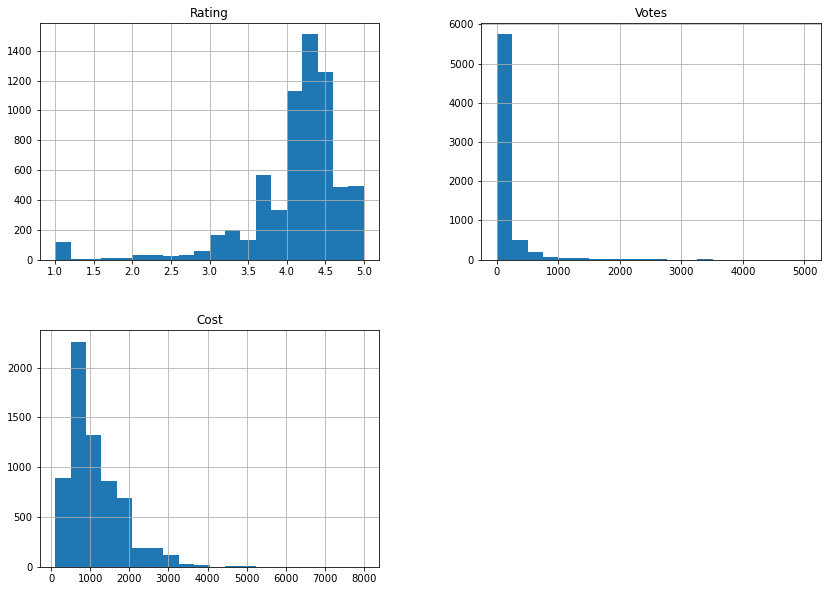

In [6]:
data.hist(bins=20, figsize=(14, 10))
plt.show()

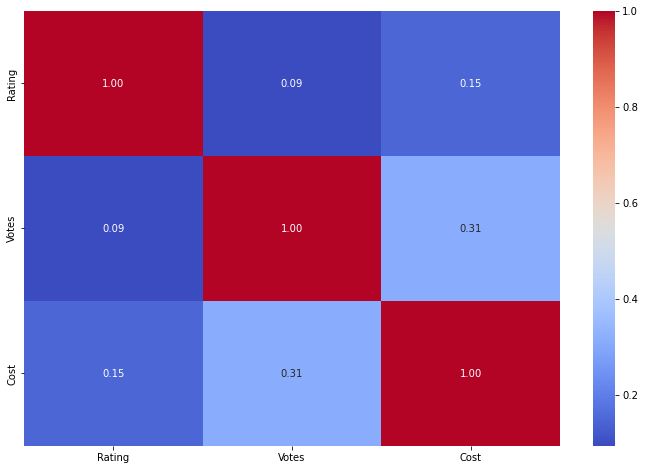

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [10]:
#GEOGRAPHIC ANALYSIS
# Analyze the number of restaurants in each city
city_counts = data['City'].value_counts()

# Analyze the number of restaurants in each locality
locality_counts = data['Locality'].value_counts()

city_counts, locality_counts.head(10)

(Bangalore     1019
 Delhi          734
 Mumbai         727
 Kolkata        712
 Hyderabad      589
 Ahmedabad      414
 Chennai        388
 Pune           351
 Jaipur         268
 Chandigarh     264
 Indore         204
 Gurgaon        184
 Noida          146
 Vadodara        91
 Lucknow         80
 Agra            75
 Nagpur          66
 Surat           64
 Ludhiana        62
 Goa             60
 Ghaziabad       50
 Udaipur         43
 Kochi            2
 Name: City, dtype: int64,
  South Bangalore    364
  South Delhi        339
  South Kolkata      310
  West Ahmedabad     236
  East Bangalore     235
  West Hyderabad     221
  Gurgaon            184
  West Delhi         173
  West Pune          171
  North Bangalore    170
 Name: Locality, dtype: int64)

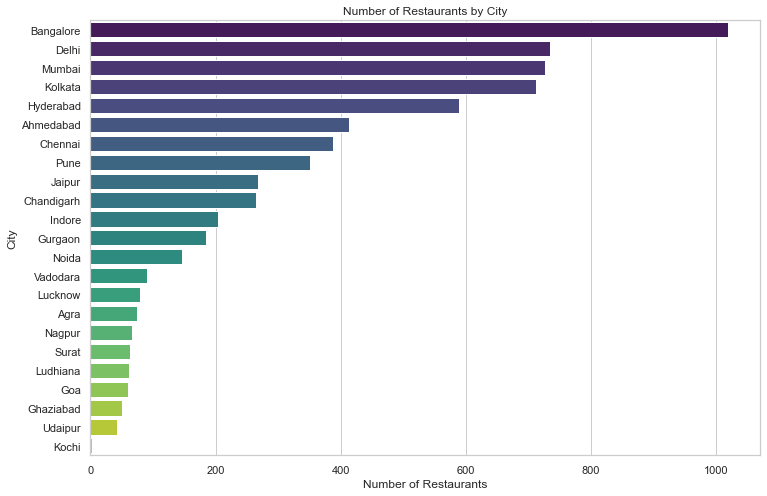

In [11]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the number of restaurants by city
plt.figure(figsize=(12, 8))
sns.barplot(y=city_counts.index, x=city_counts.values, palette="viridis")
plt.title('Number of Restaurants by City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

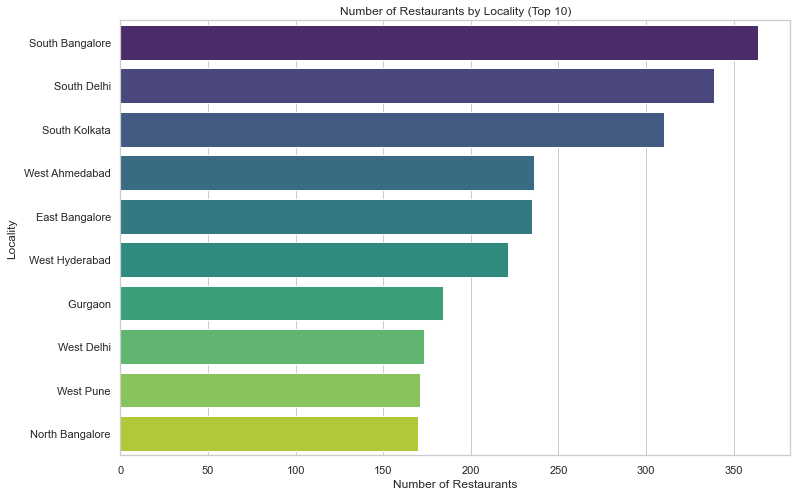

In [12]:
# Plot the number of restaurants by locality (top 10)
plt.figure(figsize=(12, 8))
sns.barplot(y=locality_counts.head(10).index, x=locality_counts.head(10).values, palette="viridis")
plt.title('Number of Restaurants by Locality (Top 10)')
plt.xlabel('Number of Restaurants')
plt.ylabel('Locality')
plt.show()

In [14]:
# Cuisine preferences
cuisine_counts = data['Cuisine'].str.split(', ').explode().value_counts().head(10)

# Ratings distribution
ratings_distribution = data['Rating'].value_counts().sort_index()

# Votes distribution
votes_distribution = data['Votes'].describe()

# Cost distribution
cost_distribution = data['Cost'].describe()

cuisine_counts, ratings_distribution, votes_distribution, cost_distribution

(North Indian     2228
  Chinese         2007
  Continental     1391
  Italian         1093
  North Indian    1068
  Fast Food       1044
 Multi-Cuisine     659
 Fast Food         598
  Seafood          558
 Italian           457
 Name: Cuisine, dtype: int64,
 1.0    118
 1.3      4
 1.4      3
 1.5      3
 1.6      4
 1.7      7
 1.8      4
 1.9      5
 2.0     18
 2.1     12
 2.2      8
 2.3     13
 2.4      7
 2.5     22
 2.6     13
 2.7     20
 2.8     30
 2.9     26
 3.0    123
 3.1     44
 3.2     39
 3.3     77
 3.4     82
 3.5    133
 3.6    144
 3.7    179
 3.8    245
 3.9    334
 4.0    555
 4.1    575
 4.2    699
 4.3    811
 4.4    681
 4.5    576
 4.6    281
 4.7    131
 4.8     72
 4.9     19
 5.0    476
 Name: Rating, dtype: int64,
 count    6593.000000
 mean      119.420143
 std       261.849704
 min         1.000000
 25%         6.000000
 50%        31.000000
 75%       115.000000
 max      5016.000000
 Name: Votes, dtype: float64,
 count    6593.000000
 mean     1102.

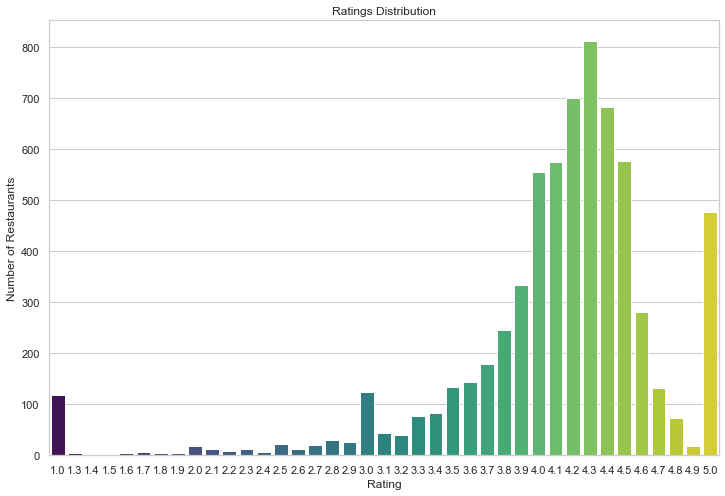

In [15]:
# Plot the ratings distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=ratings_distribution.index, y=ratings_distribution.values, palette="viridis")
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

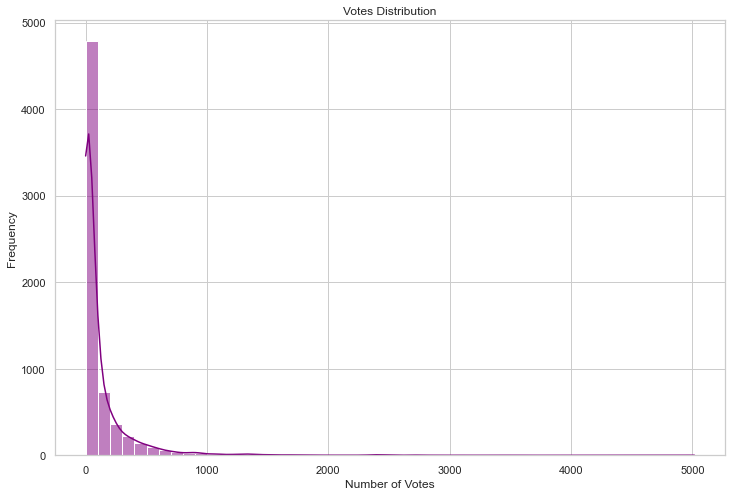

In [17]:
# Plot the votes distribution
plt.figure(figsize=(12, 8))
sns.histplot(data['Votes'], bins=50, kde=True, color="purple")
plt.title('Votes Distribution')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

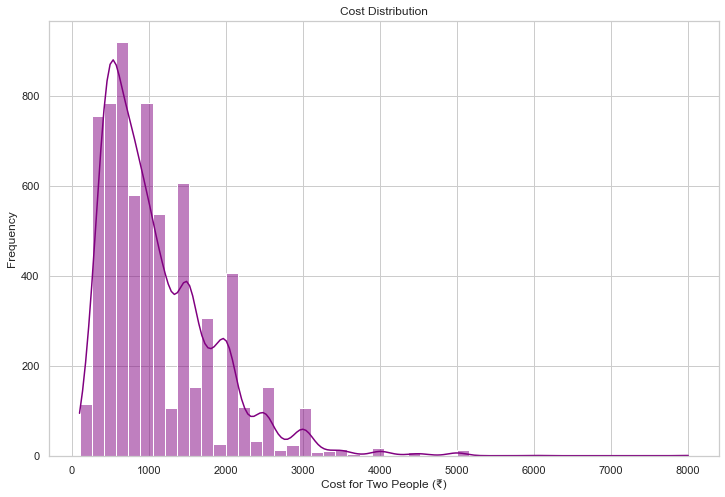

In [18]:
# Plot the cost distribution
plt.figure(figsize=(12, 8))
sns.histplot(data['Cost'], bins=50, kde=True, color="purple")
plt.title('Cost Distribution')
plt.xlabel('Cost for Two People (₹)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Market Segmentation using K-Means Clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))


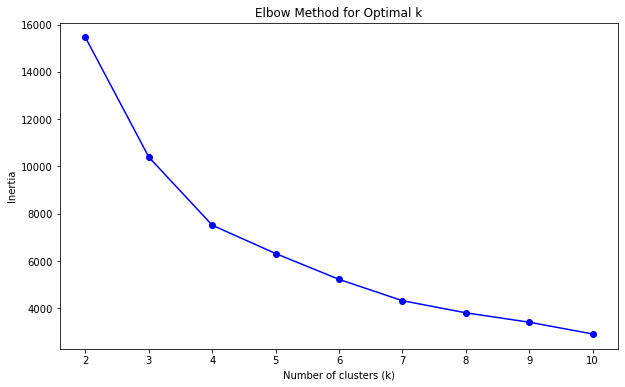

In [9]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

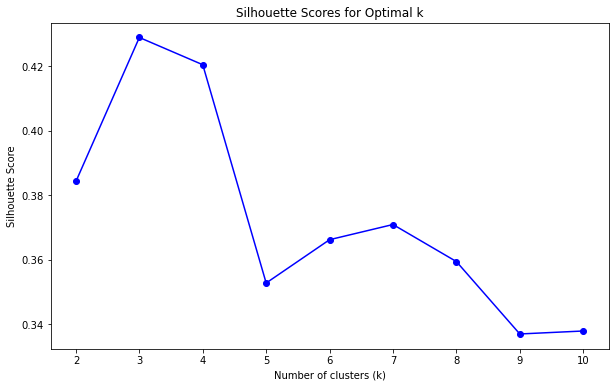

In [10]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

In [11]:
# Choose the optimal number of clusters (let's assume k=4 for this example)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


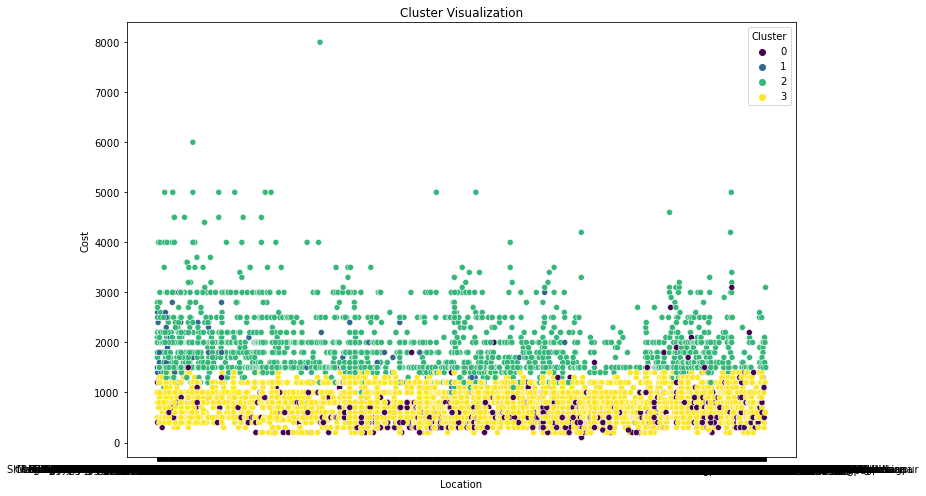

In [12]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Location'], y=data['Cost'], hue=data['Cluster'], palette='viridis')
plt.title('Cluster Visualization')
plt.show()

In [13]:
# Insights Extraction
# Calculate the mean values for each cluster
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)


           Rating        Votes         Cost
Cluster                                    
0        2.435182     7.844021   632.667244
1        4.229747  1378.696203  1761.392405
2        4.237592   194.664038  1966.824395
3        4.251820    49.222952   729.651163
